## Importing libraries

In [1]:
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib
import os

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import xlrd

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

from tensorflow.python import keras

C:\Users\Rakshit\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Rakshit\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Rakshit\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Rakshit\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:529: FutureWarnin

# Functions declaration

In [2]:
import types
import math
from datetime import datetime
def file_read(path , sheet):
    df = pd.read_excel(path , sheet_name = sheet , converters={'Arrival time':str})
    rows , cols = df.shape
    cols = 4
    index = 0
    arrivalTimes = []
    # Subtracting 1 row as the first row is not the 
    dataset = np.zeros(shape=(rows - 1 , cols))
    columns = df.columns
    print(rows , cols)

    prev = df.loc[0].at['Arrival time']
    for row in range(1 , rows) :
        arrivalTime = df.loc[row].at['Arrival time']
        arrivalHour = ""
        arrivalMinute = ""
        # to avoid the empty times in dataset
        if(pd.isnull(df.loc[row].at['Arrival time'])) : 
            arrivalTime = prev
            print(arrivalTime , type(arrivalTime))
        if(type(arrivalTime) == str):
            if(len(arrivalTime) <= 2) :
                arrivalTime = arrivalTime + ":00:00"
            arrivalTime = datetime.strptime(arrivalTime , "%H:%M:%S")
        arrivalHour = arrivalTime.hour
        arrivalMinute = arrivalTime.minute
        waitingMinutes = df.loc[row].at['X1']
        serviceMinutes = df.loc[row].at['X2']
        arrivalTimes.append(arrivalTime)
        dataset[index] = [arrivalHour, arrivalMinute, waitingMinutes, serviceMinutes]
        index = index + 1
        prev = arrivalTime
    return dataset, arrivalTimes

# Data loading and overview

In [3]:
filenames = []
rootFilePath = './BankDataCsv/'
fullDataset = pd.DataFrame()
order = ['FIRST' , 'SECOND ' , 'THIRD']

for bankCounter in range(0 , 3):
    for weekCounter in range(0 , 4):
        for dayCounter in range(0 , 5):
            filename = order[bankCounter] + ' BANK (WEEK ' + str(weekCounter + 1) + ')'
            fullPath = rootFilePath + filename + '.xlsx'
            sheetName = 'Sheet' + str(dayCounter + 1)
            filenames.append(fullPath)
            print(fullPath , sheetName)
            
            tempFeatures, tempArrivalTimes = file_read(rootFilePath + filename + '.xlsx', sheetName)
            dfTempFeatures = pd.DataFrame(np.array(tempFeatures), columns=['hour', 'minutes', 'waitingTime', 'serviceTime'])
            dfTempArrivalTimes = pd.DataFrame(np.array(tempArrivalTimes), columns=['arrivalTime'])
            timeLeavingTheQueue = []
            numberOfRows , cols = dfTempFeatures.shape
            
            for arrivalTimeCounter in range(numberOfRows):
                timeLeavingTheQueue.append(dfTempArrivalTimes.at[arrivalTimeCounter, 'arrivalTime'] + pd.Timedelta(minutes = dfTempFeatures.at[arrivalTimeCounter, 'waitingTime']))
            dftimeLeavingTheQueue = pd.DataFrame(np.array(timeLeavingTheQueue), columns=['timeLeavingTheQueue'])
            
            waitingPeople = np.zeros(numberOfRows)
            for i in range(numberOfRows):
                for j in range(i):
                    if (dfTempArrivalTimes.at[i, 'arrivalTime'] < dftimeLeavingTheQueue.at[j, 'timeLeavingTheQueue']):
                        waitingPeople[i] += 1
            dfWaitingPeople = pd.DataFrame(np.array(waitingPeople), columns=['waitingPeople'])

            dayOfWeek = np.zeros(numberOfRows)
            for i in range(numberOfRows):
                dayOfWeek[i] = dayCounter
            dfDayOfWeek = pd.DataFrame(np.array(dayOfWeek), columns=['dayOfWeek'])

            dfWaitingPeople['waitingPeople'] = dfWaitingPeople['waitingPeople'].astype(int)
            dfTempFeatures['hour'] = dfTempFeatures['hour'].astype(int)
            dfTempFeatures['minutes'] = dfTempFeatures['minutes'].astype(int)
            dfDayOfWeek['dayOfWeek'] = dfDayOfWeek['dayOfWeek'].astype(int)

            tempDataset = pd.concat([dfTempFeatures, dfWaitingPeople, dfDayOfWeek], axis=1)

            fullDataset = pd.concat([fullDataset, tempDataset], axis=0)
            #print(fullDataset)

fullDataset = fullDataset.reset_index(drop = True)
print(fullDataset.shape[0])

./BankDataCsv/FIRST BANK (WEEK 1).xlsx Sheet1
880 4
./BankDataCsv/FIRST BANK (WEEK 1).xlsx Sheet2
720 4
./BankDataCsv/FIRST BANK (WEEK 1).xlsx Sheet3
1020 4
./BankDataCsv/FIRST BANK (WEEK 1).xlsx Sheet4
802 4
./BankDataCsv/FIRST BANK (WEEK 1).xlsx Sheet5
522 4
./BankDataCsv/FIRST BANK (WEEK 2).xlsx Sheet1
989 4
./BankDataCsv/FIRST BANK (WEEK 2).xlsx Sheet2
684 4
./BankDataCsv/FIRST BANK (WEEK 2).xlsx Sheet3
548 4
./BankDataCsv/FIRST BANK (WEEK 2).xlsx Sheet4
1020 4
./BankDataCsv/FIRST BANK (WEEK 2).xlsx Sheet5
789 4
./BankDataCsv/FIRST BANK (WEEK 3).xlsx Sheet1
1000 4
1900-01-01 14:55:00 <class 'datetime.datetime'>
./BankDataCsv/FIRST BANK (WEEK 3).xlsx Sheet2
990 4
./BankDataCsv/FIRST BANK (WEEK 3).xlsx Sheet3
1001 4
1900-01-01 14:59:00 <class 'datetime.datetime'>
./BankDataCsv/FIRST BANK (WEEK 3).xlsx Sheet4
1051 4
./BankDataCsv/FIRST BANK (WEEK 3).xlsx Sheet5
982 4
./BankDataCsv/FIRST BANK (WEEK 4).xlsx Sheet1
857 4
./BankDataCsv/FIRST BANK (WEEK 4).xlsx Sheet2
981 4
./BankDataCsv/F

In [4]:
print(f'The dataset has {fullDataset.shape[0]} rows and {fullDataset.shape[1]} columns.')

The dataset has 52438 rows and 6 columns.


In [5]:
fullDataset.head()

,hour,minutes,waitingTime,serviceTime,waitingPeople,dayOfWeek
0,8,0,13.0,25.0,0,0
1,8,0,14.0,26.0,1,0
2,8,0,9.0,26.0,2,0
3,8,0,14.0,23.0,3,0
4,8,0,10.0,26.0,4,0


In [6]:
fullDataset.describe()

,hour,minutes,waitingTime,serviceTime,waitingPeople,dayOfWeek
count,52438.000000,52438.000000,52438.000000,52438.000000,52438.000000,52438.000000
mean,10.678687,27.819101,13.466931,13.436604,31.342709,1.956558
std,2.150014,17.422920,6.053448,5.918383,18.482370,1.409737
min,8.000000,0.000000,3.004883,4.000488,0.000000,0.000000
25%,9.000000,13.000000,9.089557,8.734397,18.000000,1.000000
50%,10.000000,27.000000,12.077746,12.287317,27.000000,2.000000
75%,13.000000,43.000000,16.746361,17.117939,40.000000,3.000000
max,14.000000,59.000000,34.984741,35.999512,163.000000,4.000000


In [7]:
print(f'There are {fullDataset.isnull().any().sum()} columns in the dataset with missing values.')

There are 0 columns in the dataset with missing values.


## Data exploration

In [8]:
myMean = fullDataset["waitingTime"].mean()
print(f'The mean waiting time in the dataset is {myMean} minutes.')

The mean waiting time in the dataset is 13.466931226102984 minutes.


In [9]:
myMedian = fullDataset["waitingTime"].median()
print(f'The median waiting time in the dataset is {myMedian} minutes.')

The median waiting time in the dataset is 12.077745902890104 minutes.


In [10]:
myStd = fullDataset["waitingTime"].std()
print(f'The standard deviation of the waiting time in the dataset is {myStd} minutes.')

The standard deviation of the waiting time in the dataset is 6.053447569971992 minutes.


In [11]:
myMean2 = fullDataset["waitingPeople"].mean()
print(f'The mean of the waiting people variable in the dataset is {myMean2} minutes.')

The mean of the waiting people variable in the dataset is 31.342709485487624 minutes.


In [12]:
myMedian2 = fullDataset["waitingPeople"].median()
print(f'The median of the waiting people variable in the dataset is {myMean2} minutes.')

The median of the waiting people variable in the dataset is 31.342709485487624 minutes.


In [13]:
myStd2 = fullDataset["waitingPeople"].std()
print(f'The standard deviation of the waiting people variable in the dataset is {myStd} minutes.')

The standard deviation of the waiting people variable in the dataset is 6.053447569971992 minutes.


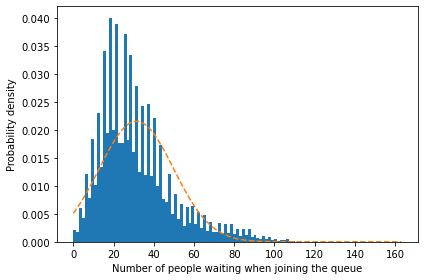

In [46]:
# data to be plotted
mu = fullDataset["waitingPeople"].mean()  # mean of distribution
sigma = fullDataset["waitingPeople"].std()  # standard deviation of distribution
x = fullDataset["waitingPeople"]

num_bins = 111

fig, ax = plt.subplots()

# the histogram of the data
n, bins, patches = ax.hist(x, num_bins, density=1)

# add a 'best fit' line
y = ((1 / (np.sqrt(2 * np.pi) * sigma)) *
     np.exp(-0.5 * (1 / sigma * (bins - mu))**2))
ax.plot(bins, y, '--')
ax.set_xlabel('Number of people waiting when joining the queue')
ax.set_ylabel('Probability density')

# Tweak spacing to prevent clipping of ylabel
fig.tight_layout()
plt.savefig('./plots/waitingPeopleHistogram.pdf')
plt.savefig('./plots/waitingPeopleHistogram.jpeg')

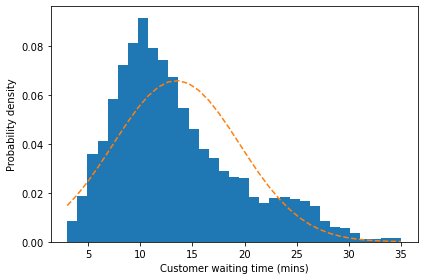

In [47]:
# data to be plotted
mu = fullDataset["waitingTime"].mean()  # mean of distribution
sigma = fullDataset["waitingTime"].std()  # standard deviation of distribution
x = fullDataset["waitingTime"]

num_bins = 33

fig, ax = plt.subplots()

# the histogram of the data
n, bins, patches = ax.hist(x, num_bins, density=1)

# add a 'best fit' line
y = ((1 / (np.sqrt(2 * np.pi) * sigma)) *
     np.exp(-0.5 * (1 / sigma * (bins - mu))**2))
ax.plot(bins, y, '--')
ax.set_xlabel('Customer waiting time (mins)')
ax.set_ylabel('Probability density')

# Tweak spacing to prevent clipping of ylabel
fig.tight_layout()
plt.savefig('./plots/waitingTimeHistogram.pdf')
plt.savefig('./plots/waitingTimeHistogram.jpeg')

# Feature engineering

In [16]:
workingCopyDataset = fullDataset.copy()
workingCopyDataset.drop(columns = ['serviceTime'], axis=1 , inplace = True);
print(fullDataset)
print(workingCopyDataset)

       hour  minutes  waitingTime  serviceTime  waitingPeople  dayOfWeek
0         8        0    13.000000    25.000000              0          0
1         8        0    14.000000    26.000000              1          0
2         8        0     9.000000    26.000000              2          0
3         8        0    14.000000    23.000000              3          0
4         8        0    10.000000    26.000000              4          0
...     ...      ...          ...          ...            ...        ...
52433    14       57    12.865810    13.602039             25          4
52434    14       58     8.851833    12.369884             23          4
52435    14       59     8.364574    14.479507             23          4
52436    14       59    11.140172    16.237373             24          4
52437    14       59     8.690512    15.729789             25          4

[52438 rows x 6 columns]
       hour  minutes  waitingTime  waitingPeople  dayOfWeek
0         8        0    13.000000     

In [17]:
# mean encoding for regression output
def mean_encoder_regression(input_vector, output_vector):
    assert len(input_vector) == len(output_vector)
    numberOfRows = len(input_vector)

    temp = pd.concat([input_vector, output_vector], axis=1)
    # Compute target mean 
    averages = temp.groupby(by=input_vector.name)[output_vector.name].agg(["mean", "count"])
    
    print(averages)
    return_vector = pd.DataFrame(0, index=np.arange(numberOfRows), columns={'feature'})

    
    for i in range(numberOfRows):
        return_vector.iloc[i] = averages['mean'][input_vector.iloc[i]]
        
    return return_vector

In [18]:
encoded_input_vector_hour = mean_encoder_regression(workingCopyDataset['hour'], workingCopyDataset['waitingTime'])
encoded_input_vector_hour.columns = ['hour']
encoded_input_vector_minutes = mean_encoder_regression(workingCopyDataset['minutes'], workingCopyDataset['waitingTime'])
encoded_input_vector_minutes.columns = ['minutes']
encoded_input_vector_dayOfWeek = mean_encoder_regression(workingCopyDataset['dayOfWeek'], workingCopyDataset['waitingTime'])
encoded_input_vector_dayOfWeek.columns = ['dayOfWeek']

           mean  count
hour                  
8     13.274694  11753
9     13.453950   8682
10    13.165009   6076
11    13.625223   5840
12    13.318908   6249
13    13.303670   5913
14    14.119612   7925
              mean  count
minutes                  
0        13.374713   1197
1        13.530645   1305
2        13.512084    880
3        13.492214   1003
4        13.729889    960
5        13.242043   1150
6        13.362166    687
7        13.588385   1053
8        13.149938    823
9        13.565377    849
10       13.471173    832
11       13.584626   1183
12       13.566405    788
13       13.396478    874
14       13.675671    825
15       13.611771   1153
16       13.626022    860
17       13.765999   1229
18       13.757744    761
19       13.615269   1322
20       13.528420   1013
21       13.763088    881
22       14.233882    660
23       13.158891   1094
24       13.770416    796
25       13.280543   1128
26       13.831926    819
27       13.467731    971
28       13.7

In [19]:
X = pd.concat([encoded_input_vector_hour['hour'], encoded_input_vector_minutes['minutes'], pd.DataFrame(workingCopyDataset['waitingPeople']), encoded_input_vector_dayOfWeek['dayOfWeek']], axis=1)
y = workingCopyDataset['waitingTime']
print(X)
print(y)

            hour    minutes  waitingPeople  dayOfWeek
0      13.274694  13.374713              0  14.283682
1      13.274694  13.374713              1  14.283682
2      13.274694  13.374713              2  14.283682
3      13.274694  13.374713              3  14.283682
4      13.274694  13.374713              4  14.283682
...          ...        ...            ...        ...
52433  14.119612  13.547451             25  12.812315
52434  14.119612  13.740565             23  12.812315
52435  14.119612  12.881973             23  12.812315
52436  14.119612  12.881973             24  12.812315
52437  14.119612  12.881973             25  12.812315

[52438 rows x 4 columns]
0        13.000000
1        14.000000
2         9.000000
3        14.000000
4        10.000000
           ...    
52433    12.865810
52434     8.851833
52435     8.364574
52436    11.140172
52437     8.690512
Name: waitingTime, Length: 52438, dtype: float64


In [20]:
X.describe()

,hour,minutes,waitingPeople,dayOfWeek
count,52438.000000,52438.000000,52438.000000,52438.000000
mean,13.466931,13.466931,31.342709,13.466931
std,0.302758,0.311418,18.482370,0.613400
min,13.165009,12.758771,0.000000,12.812315
25%,13.274694,13.234525,18.000000,12.954143
50%,13.318908,13.492214,27.000000,13.094982
75%,13.625223,13.645708,40.000000,14.076222
max,14.119612,14.272698,163.000000,14.283682


# Prepare data for modeling

In [21]:
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.2, random_state=42)
print(trainX.shape, trainy.shape)
print(testX.shape, testy.shape)

(41950, 4) (41950,)
(10488, 4) (10488,)


In [22]:
def scale_input(X, means, stds):
    return (X - means) / stds

def descale_input(X, means, stds):
    return (X * stds) + means

In [23]:
meansX = trainX.mean(axis=0)
stdsX = trainX.std(axis=0) + 1e-10

In [24]:
trainX_scaled = scale_input(trainX, meansX, stdsX)
testX_scaled = scale_input(testX, meansX, stdsX)

# Neural network

In [25]:
# Import keras library
import keras
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [26]:
# create a deep learning model
inputVariables = 4
model = Sequential()
model.add(Dense(12, input_dim=inputVariables, kernel_initializer='normal', activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='linear'))
model.summary()
model.compile(loss='mae', optimizer='adam')

Instructions for updating:
Colocations handled automatically by placer.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 12)                60        
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 104       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 9         
Total params: 173
Trainable params: 173
Non-trainable params: 0
_________________________________________________________________


In [27]:
# train model
numberOfEpochs = 500
batchSize = 256
history = model.fit(trainX_scaled, trainy, epochs=numberOfEpochs, batch_size=batchSize, verbose=1, validation_split=0.2)

Instructions for updating:
Use tf.cast instead.
Train on 33560 samples, validate on 8390 samples
Epoch 1/500
33560/33560 [==============================] - 0s 7us/step - loss: 13.1741 - val_loss: 12.7500
Epoch 2/500
33560/33560 [==============================] - 0s 4us/step - loss: 11.0389 - val_loss: 8.7691
Epoch 3/500
33560/33560 [==============================] - 0s 4us/step - loss: 6.2907 - val_loss: 4.5560
Epoch 4/500
33560/33560 [==============================] - 0s 5us/step - loss: 4.1307 - val_loss: 3.9329
Epoch 5/500
33560/33560 [==============================] - 0s 4us/step - loss: 3.9189 - val_loss: 3.8640
Epoch 6/500
33560/33560 [==============================] - 0s 5us/step - loss: 3.8647 - val_loss: 3.8265
Epoch 7/500
33560/33560 [==============================] - 0s 4us/step - loss: 3.8279 - val_loss: 3.7981
Epoch 8/500
33560/33560 [==============================] - 0s 4us/step - loss: 3.8023 - val_loss: 3.7808
Epoch 9/500
33560/33560 [==============================] - 0

Epoch 152/500
33560/33560 [==============================] - 0s 4us/step - loss: 3.6058 - val_loss: 3.6110
Epoch 153/500
33560/33560 [==============================] - 0s 4us/step - loss: 3.6053 - val_loss: 3.6121
Epoch 154/500
33560/33560 [==============================] - 0s 4us/step - loss: 3.6060 - val_loss: 3.6122
Epoch 155/500
33560/33560 [==============================] - 0s 4us/step - loss: 3.6058 - val_loss: 3.6163
Epoch 156/500
33560/33560 [==============================] - 0s 4us/step - loss: 3.6056 - val_loss: 3.6116
Epoch 157/500
33560/33560 [==============================] - 0s 4us/step - loss: 3.6058 - val_loss: 3.6105
Epoch 158/500
33560/33560 [==============================] - 0s 4us/step - loss: 3.6052 - val_loss: 3.6108
Epoch 159/500
33560/33560 [==============================] - 0s 4us/step - loss: 3.6056 - val_loss: 3.6146
Epoch 160/500
33560/33560 [==============================] - 0s 5us/step - loss: 3.6052 - val_loss: 3.6184
Epoch 161/500
33560/33560 [==========

33560/33560 [==============================] - 0s 4us/step - loss: 3.5959 - val_loss: 3.6028
Epoch 305/500
33560/33560 [==============================] - 0s 4us/step - loss: 3.5951 - val_loss: 3.6067
Epoch 306/500
33560/33560 [==============================] - 0s 4us/step - loss: 3.5964 - val_loss: 3.6089
Epoch 307/500
33560/33560 [==============================] - 0s 4us/step - loss: 3.5952 - val_loss: 3.6050
Epoch 308/500
33560/33560 [==============================] - 0s 4us/step - loss: 3.5949 - val_loss: 3.6047
Epoch 309/500
33560/33560 [==============================] - 0s 4us/step - loss: 3.5949 - val_loss: 3.6066
Epoch 310/500
33560/33560 [==============================] - 0s 4us/step - loss: 3.5955 - val_loss: 3.6056
Epoch 311/500
33560/33560 [==============================] - 0s 4us/step - loss: 3.5948 - val_loss: 3.6041
Epoch 312/500
33560/33560 [==============================] - 0s 4us/step - loss: 3.5942 - val_loss: 3.6057
Epoch 313/500
33560/33560 [========================

33560/33560 [==============================] - 0s 4us/step - loss: 3.5927 - val_loss: 3.6024
Epoch 457/500
33560/33560 [==============================] - 0s 4us/step - loss: 3.5924 - val_loss: 3.6056
Epoch 458/500
33560/33560 [==============================] - 0s 4us/step - loss: 3.5926 - val_loss: 3.6021
Epoch 459/500
33560/33560 [==============================] - 0s 4us/step - loss: 3.5926 - val_loss: 3.6045
Epoch 460/500
33560/33560 [==============================] - 0s 4us/step - loss: 3.5922 - val_loss: 3.6000
Epoch 461/500
33560/33560 [==============================] - 0s 4us/step - loss: 3.5916 - val_loss: 3.6027
Epoch 462/500
33560/33560 [==============================] - 0s 4us/step - loss: 3.5924 - val_loss: 3.6025
Epoch 463/500
33560/33560 [==============================] - 0s 4us/step - loss: 3.5926 - val_loss: 3.6021
Epoch 464/500
33560/33560 [==============================] - 0s 4us/step - loss: 3.5913 - val_loss: 3.6037
Epoch 465/500
33560/33560 [========================

In [28]:
# list all data in history
print(history.history.keys())

dict_keys(['val_loss', 'loss'])


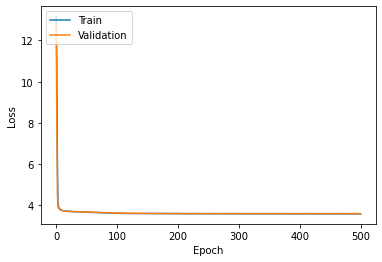

In [29]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
#plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
#plt.show()
plt.savefig('./plots/loss.pdf')

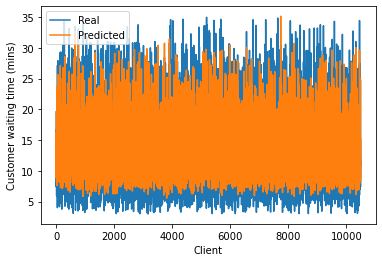

In [30]:
testy_pred = model.predict(testX_scaled)
myLength = len(testy_pred)
plt.plot(range(myLength), testy)
plt.plot(range(myLength), testy_pred)
plt.ylabel('Customer waiting time (mins)')
plt.xlabel('Client')
plt.legend(['Real', 'Predicted'], loc='upper left')
plt.savefig('./plots/realVsPredictedWaitingTimes.pdf')

In [31]:
myMae = mean_absolute_error(testy, testy_pred)
print(f'The mean absolute error I get with the neural network is {myMae} minutes.')

The mean absolute error I get with the neural network is 3.5989160698995066 minutes.


In [32]:
myLength = len(testy_pred)
myFMean = np.mean(trainy)
myFMedian = np.median(trainy)
testyMean = testy_pred.copy()
testyMedian = testy_pred.copy()
for i in range(myLength):
    testyMean[i] = myFMean
    testyMedian[i] = myFMedian

In [33]:
myMaeNaiveMean = mean_absolute_error(testy, testyMean)
print(f'The mean absolute error I get with the naive mean model is {myMaeNaiveMean} minutes.')

The mean absolute error I get with the naive mean model is 4.7836474744973 minutes.


In [34]:
myMaeNaiveMedian = mean_absolute_error(testy, testyMedian)
print(f'The mean absolute error I get with the naive median model is {myMaeNaiveMedian} minutes.')

The mean absolute error I get with the naive median model is 4.66107627253721 minutes.


In [55]:
# Mega Addition 

# The values you want to test go in the parameters dictionary

# Running this code will take hours 

# Changing the loss model to binary cross entropy

from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from keras.layers import Dropout
from sklearn.model_selection import GridSearchCV

def build_classifiers(optimizer = 'adam') :
    classifier = Sequential() 
    classifier.add(Dense(12 , kernel_initializer = 'normal' , activation = 'relu' , input_dim = inputVariables))
    classifier.add(Dense(8 , kernel_initializer = 'normal' , activation = 'relu'))
    classifier.add(Dense(1 , kernel_initializer = 'normal' , activation = 'linear')) 
    classifier.compile(optimizer = optimizer , loss = 'binary_crossentropy' , metrics = ['accuracy'])
    return classifier

classifier = KerasClassifier(build_fn = build_classifiers)

In [56]:
parameters = {'batch_size' : [100 , 256] , 
              'epochs' : [100 , 250] , 
             'optimizer' : ['adam' , 'rmsprop']} 
# rms prop is another opt primarily used for RNN

In [57]:
grid_search = GridSearchCV(estimator = classifier, param_grid = parameters , cv = 3)
grid_search = grid_search.fit(trainX_scaled , trainy)
best_parameters = grid_search.best_params_
best_accuracy = grid_search.best_score_

Epoch 1/100
27966/27966 [==============================] - 2s 89us/step - loss: -39573.4857 - accuracy: 7.1515e-05
Epoch 2/100
27966/27966 [==============================] - 2s 60us/step - loss: -211742.8057 - accuracy: 7.1515e-05
Epoch 3/100
27966/27966 [==============================] - 1s 50us/step - loss: -211758.3385 - accuracy: 7.1515e-05
Epoch 4/100
27966/27966 [==============================] - 2s 54us/step - loss: -211758.3396 - accuracy: 7.1515e-05
Epoch 5/100
27966/27966 [==============================] - 1s 36us/step - loss: -211758.3377 - accuracy: 7.1515e-05
Epoch 6/100
27966/27966 [==============================] - 1s 27us/step - loss: -211758.3379 - accuracy: 7.1515e-05
Epoch 7/100
27966/27966 [==============================] - 1s 33us/step - loss: -211758.3380 - accuracy: 7.1515e-05
Epoch 8/100
27966/27966 [==============================] - 1s 36us/step - loss: -211758.3381 - accuracy: 7.1515e-05
Epoch 9/100
27966/27966 [==============================] - 1s 30us/step -

27967/27967 [==============================] - 1s 26us/step - loss: -212066.8531 - accuracy: 7.1513e-05
Epoch 39/100
27967/27967 [==============================] - 1s 31us/step - loss: -212066.8528 - accuracy: 7.1513e-05
Epoch 40/100
27967/27967 [==============================] - 1s 42us/step - loss: -212066.8522 - accuracy: 7.1513e-05
Epoch 41/100
27967/27967 [==============================] - 1s 37us/step - loss: -212066.8521 - accuracy: 7.1513e-05 1s - loss:
Epoch 42/100
27967/27967 [==============================] - 1s 40us/step - loss: -212066.8523 - accuracy: 7.1513e-05
Epoch 43/100
27967/27967 [==============================] - 1s 43us/step - loss: -212066.8516 - accuracy: 7.1513e-05
Epoch 44/100
27967/27967 [==============================] - 1s 40us/step - loss: -212066.8520 - accuracy: 7.1513e-05
Epoch 45/100
27967/27967 [==============================] - 1s 40us/step - loss: -212066.8519 - accuracy: 7.1513e-05
Epoch 46/100
27967/27967 [==============================] - 1s 28u

27967/27967 [==============================] - 1s 28us/step - loss: -211754.6474 - accuracy: 3.5756e-05
Epoch 77/100
27967/27967 [==============================] - 1s 29us/step - loss: -211754.6482 - accuracy: 3.5756e-05
Epoch 78/100
27967/27967 [==============================] - 1s 31us/step - loss: -211754.6494 - accuracy: 3.5756e-05
Epoch 79/100
27967/27967 [==============================] - 1s 26us/step - loss: -211754.6484 - accuracy: 3.5756e-05
Epoch 80/100
27967/27967 [==============================] - 1s 32us/step - loss: -211754.6481 - accuracy: 3.5756e-05
Epoch 81/100
27967/27967 [==============================] - 1s 32us/step - loss: -211754.6486 - accuracy: 3.5756e-05
Epoch 82/100
27967/27967 [==============================] - 1s 40us/step - loss: -211754.6481 - accuracy: 3.5756e-05
Epoch 83/100
27967/27967 [==============================] - 1s 32us/step - loss: -211754.6490 - accuracy: 3.5756e-05
Epoch 84/100
27967/27967 [==============================] - 1s 44us/step - lo

27967/27967 [==============================] - 1s 31us/step - loss: -212066.8506 - accuracy: 3.5756e-05 0s - loss: -211494
Epoch 15/100
27967/27967 [==============================] - 1s 36us/step - loss: -212066.8520 - accuracy: 3.5756e-05
Epoch 16/100
27967/27967 [==============================] - 1s 43us/step - loss: -212066.8520 - accuracy: 3.5756e-05
Epoch 17/100
27967/27967 [==============================] - 1s 46us/step - loss: -212066.8522 - accuracy: 3.5756e-05
Epoch 18/100
27967/27967 [==============================] - 1s 36us/step - loss: -212066.8526 - accuracy: 3.5756e-05
Epoch 19/100
27967/27967 [==============================] - 1s 35us/step - loss: -212066.8518 - accuracy: 3.5756e-05
Epoch 20/100
27967/27967 [==============================] - 1s 32us/step - loss: -212066.8516 - accuracy: 3.5756e-05
Epoch 21/100
27967/27967 [==============================] - 1s 35us/step - loss: -212066.8529 - accuracy: 3.5756e-05
Epoch 22/100
27967/27967 [==============================] 

27967/27967 [==============================] - 1s 34us/step - loss: -211754.6485 - accuracy: 7.1513e-05
Epoch 51/100
27967/27967 [==============================] - 1s 39us/step - loss: -211754.6497 - accuracy: 7.1513e-05
Epoch 52/100
27967/27967 [==============================] - 1s 45us/step - loss: -211754.6488 - accuracy: 7.1513e-05
Epoch 53/100
27967/27967 [==============================] - 1s 39us/step - loss: -211754.6491 - accuracy: 7.1513e-05
Epoch 54/100
27967/27967 [==============================] - 1s 31us/step - loss: -211754.6494 - accuracy: 7.1513e-05
Epoch 55/100
27967/27967 [==============================] - 1s 36us/step - loss: -211754.6488 - accuracy: 7.1513e-05
Epoch 56/100
27967/27967 [==============================] - 1s 29us/step - loss: -211754.6489 - accuracy: 7.1513e-05 0s - loss: -212783.0
Epoch 57/100
27967/27967 [==============================] - 1s 28us/step - loss: -211754.6487 - accuracy: 7.1513e-05
Epoch 58/100
27967/27967 [==============================

27966/27966 [==============================] - 1s 31us/step - loss: -211758.3375 - accuracy: 3.5758e-05
Epoch 20/250
27966/27966 [==============================] - 1s 28us/step - loss: -211758.3389 - accuracy: 3.5758e-05
Epoch 21/250
27966/27966 [==============================] - 1s 28us/step - loss: -211758.3380 - accuracy: 3.5758e-05
Epoch 22/250
27966/27966 [==============================] - 1s 37us/step - loss: -211758.3386 - accuracy: 3.5758e-05
Epoch 23/250
27966/27966 [==============================] - 1s 37us/step - loss: -211758.3376 - accuracy: 3.5758e-05
Epoch 24/250
27966/27966 [==============================] - 1s 32us/step - loss: -211758.3386 - accuracy: 3.5758e-05
Epoch 25/250
27966/27966 [==============================] - 1s 42us/step - loss: -211758.3391 - accuracy: 3.5758e-05
Epoch 26/250
27966/27966 [==============================] - 1s 46us/step - loss: -211758.3389 - accuracy: 3.5758e-05
Epoch 27/250
27966/27966 [==============================] - 1s 51us/step - lo

27966/27966 [==============================] - 1s 46us/step - loss: -211758.3384 - accuracy: 3.5758e-05
Epoch 157/250
27966/27966 [==============================] - 1s 33us/step - loss: -211758.3375 - accuracy: 3.5758e-05
Epoch 158/250
27966/27966 [==============================] - 1s 28us/step - loss: -211758.3375 - accuracy: 3.5758e-05
Epoch 159/250
27966/27966 [==============================] - 1s 31us/step - loss: -211758.3383 - accuracy: 3.5758e-05
Epoch 160/250
27966/27966 [==============================] - 1s 33us/step - loss: -211758.3387 - accuracy: 3.5758e-05
Epoch 161/250
27966/27966 [==============================] - 1s 45us/step - loss: -211758.3382 - accuracy: 3.5758e-05
Epoch 162/250
27966/27966 [==============================] - 1s 35us/step - loss: -211758.3385 - accuracy: 3.5758e-05
Epoch 163/250
27966/27966 [==============================] - 1s 43us/step - loss: -211758.3367 - accuracy: 3.5758e-05
Epoch 164/250
27966/27966 [==============================] - 1s 48us/s

27967/27967 [==============================] - 1s 36us/step - loss: -212066.8521 - accuracy: 3.5756e-05
Epoch 45/250
27967/27967 [==============================] - 1s 38us/step - loss: -212066.8519 - accuracy: 3.5756e-05
Epoch 46/250
27967/27967 [==============================] - 1s 32us/step - loss: -212066.8519 - accuracy: 3.5756e-05
Epoch 47/250
27967/27967 [==============================] - 1s 32us/step - loss: -212066.8524 - accuracy: 3.5756e-05
Epoch 48/250
27967/27967 [==============================] - 1s 29us/step - loss: -212066.8510 - accuracy: 3.5756e-05
Epoch 49/250
27967/27967 [==============================] - 1s 30us/step - loss: -212066.8520 - accuracy: 3.5756e-05
Epoch 50/250
27967/27967 [==============================] - 1s 28us/step - loss: -212066.8523 - accuracy: 3.5756e-05
Epoch 51/250
27967/27967 [==============================] - 1s 32us/step - loss: -212066.8525 - accuracy: 3.5756e-05 0s - loss: -209969
Epoch 52/250
27967/27967 [==============================] 

27967/27967 [==============================] - 1s 40us/step - loss: -212066.8531 - accuracy: 3.5756e-05
Epoch 182/250
27967/27967 [==============================] - 1s 36us/step - loss: -212066.8537 - accuracy: 3.5756e-05
Epoch 183/250
27967/27967 [==============================] - 1s 49us/step - loss: -212066.8533 - accuracy: 3.5756e-05
Epoch 184/250
27967/27967 [==============================] - 1s 37us/step - loss: -212066.8522 - accuracy: 3.5756e-05
Epoch 185/250
27967/27967 [==============================] - 1s 30us/step - loss: -212066.8518 - accuracy: 3.5756e-05
Epoch 186/250
27967/27967 [==============================] - 1s 33us/step - loss: -212066.8519 - accuracy: 3.5756e-05 0s - loss: -
Epoch 187/250
27967/27967 [==============================] - 1s 40us/step - loss: -212066.8528 - accuracy: 3.5756e-05
Epoch 188/250
27967/27967 [==============================] - 1s 48us/step - loss: -212066.8523 - accuracy: 3.5756e-05
Epoch 189/250
27967/27967 [==============================

27967/27967 [==============================] - 1s 35us/step - loss: -211754.6495 - accuracy: 3.5756e-05
Epoch 69/250
27967/27967 [==============================] - 1s 42us/step - loss: -211754.6490 - accuracy: 3.5756e-05
Epoch 70/250
27967/27967 [==============================] - 1s 32us/step - loss: -211754.6481 - accuracy: 3.5756e-05
Epoch 71/250
27967/27967 [==============================] - 1s 28us/step - loss: -211754.6487 - accuracy: 3.5756e-05
Epoch 72/250
27967/27967 [==============================] - 1s 31us/step - loss: -211754.6486 - accuracy: 3.5756e-05
Epoch 73/250
27967/27967 [==============================] - 1s 32us/step - loss: -211754.6478 - accuracy: 3.5756e-05
Epoch 74/250
27967/27967 [==============================] - 1s 32us/step - loss: -211754.6484 - accuracy: 3.5756e-05
Epoch 75/250
27967/27967 [==============================] - 1s 31us/step - loss: -211754.6490 - accuracy: 3.5756e-05
Epoch 76/250
27967/27967 [==============================] - 1s 40us/step - lo

27967/27967 [==============================] - 1s 26us/step - loss: -211754.6489 - accuracy: 3.5756e-05
Epoch 205/250
27967/27967 [==============================] - 1s 30us/step - loss: -211754.6487 - accuracy: 3.5756e-05
Epoch 206/250
27967/27967 [==============================] - 1s 36us/step - loss: -211754.6495 - accuracy: 3.5756e-05
Epoch 207/250
27967/27967 [==============================] - 1s 38us/step - loss: -211754.6475 - accuracy: 3.5756e-05
Epoch 208/250
27967/27967 [==============================] - 1s 33us/step - loss: -211754.6478 - accuracy: 3.5756e-05
Epoch 209/250
27967/27967 [==============================] - 1s 48us/step - loss: -211754.6480 - accuracy: 3.5756e-05
Epoch 210/250
27967/27967 [==============================] - 1s 30us/step - loss: -211754.6477 - accuracy: 3.5756e-05
Epoch 211/250
27967/27967 [==============================] - 1s 36us/step - loss: -211754.6492 - accuracy: 3.5756e-05
Epoch 212/250
27967/27967 [==============================] - 2s 59us/s

27966/27966 [==============================] - 2s 63us/step - loss: -211758.3388 - accuracy: 3.5758e-05
Epoch 92/250
27966/27966 [==============================] - 1s 39us/step - loss: -211758.3385 - accuracy: 3.5758e-05
Epoch 93/250
27966/27966 [==============================] - 1s 45us/step - loss: -211758.3387 - accuracy: 3.5758e-05
Epoch 94/250
27966/27966 [==============================] - 1s 53us/step - loss: -211758.3377 - accuracy: 3.5758e-05
Epoch 95/250
27966/27966 [==============================] - 1s 41us/step - loss: -211758.3375 - accuracy: 3.5758e-05
Epoch 96/250
27966/27966 [==============================] - 1s 50us/step - loss: -211758.3369 - accuracy: 3.5758e-05
Epoch 97/250
27966/27966 [==============================] - 2s 70us/step - loss: -211758.3394 - accuracy: 3.5758e-05
Epoch 98/250
27966/27966 [==============================] - 2s 62us/step - loss: -211758.3372 - accuracy: 3.5758e-05
Epoch 99/250
27966/27966 [==============================] - 1s 46us/step - lo

27966/27966 [==============================] - 1s 33us/step - loss: -211758.3385 - accuracy: 3.5758e-05
Epoch 161/250
27966/27966 [==============================] - 1s 43us/step - loss: -211758.3374 - accuracy: 3.5758e-05
Epoch 162/250
27966/27966 [==============================] - 1s 43us/step - loss: -211758.3381 - accuracy: 3.5758e-05
Epoch 163/250
27966/27966 [==============================] - 1s 33us/step - loss: -211758.3377 - accuracy: 3.5758e-05
Epoch 164/250
27966/27966 [==============================] - 1s 37us/step - loss: -211758.3388 - accuracy: 3.5758e-05
Epoch 165/250
27966/27966 [==============================] - 1s 36us/step - loss: -211758.3377 - accuracy: 3.5758e-05
Epoch 166/250
27966/27966 [==============================] - 1s 34us/step - loss: -211758.3380 - accuracy: 3.5758e-05
Epoch 167/250
27966/27966 [==============================] - 1s 38us/step - loss: -211758.3377 - accuracy: 3.5758e-05
Epoch 168/250
27966/27966 [==============================] - 1s 39us/s

27967/27967 [==============================] - 1s 29us/step - loss: -212066.8524 - accuracy: 3.5756e-05
Epoch 49/250
27967/27967 [==============================] - 1s 30us/step - loss: -212066.8533 - accuracy: 3.5756e-05
Epoch 50/250
27967/27967 [==============================] - 1s 30us/step - loss: -212066.8517 - accuracy: 3.5756e-05
Epoch 51/250
27967/27967 [==============================] - 1s 26us/step - loss: -212066.8527 - accuracy: 3.5756e-05
Epoch 52/250
27967/27967 [==============================] - 1s 28us/step - loss: -212066.8507 - accuracy: 3.5756e-05
Epoch 53/250
27967/27967 [==============================] - 1s 30us/step - loss: -212066.8512 - accuracy: 3.5756e-05
Epoch 54/250
27967/27967 [==============================] - 1s 28us/step - loss: -212066.8522 - accuracy: 3.5756e-05
Epoch 55/250
27967/27967 [==============================] - 1s 28us/step - loss: -212066.8517 - accuracy: 3.5756e-05
Epoch 56/250
27967/27967 [==============================] - 1s 29us/step - lo

27967/27967 [==============================] - 1s 29us/step - loss: -212066.8534 - accuracy: 3.5756e-05
Epoch 186/250
27967/27967 [==============================] - 1s 25us/step - loss: -212066.8520 - accuracy: 3.5756e-05
Epoch 187/250
27967/27967 [==============================] - 1s 30us/step - loss: -212066.8523 - accuracy: 3.5756e-05
Epoch 188/250
27967/27967 [==============================] - 1s 28us/step - loss: -212066.8525 - accuracy: 3.5756e-05
Epoch 189/250
27967/27967 [==============================] - 1s 25us/step - loss: -212066.8536 - accuracy: 3.5756e-05
Epoch 190/250
27967/27967 [==============================] - 1s 29us/step - loss: -212066.8518 - accuracy: 3.5756e-05 0s - loss: -211328.5490 - accu
Epoch 191/250
27967/27967 [==============================] - 1s 26us/step - loss: -212066.8521 - accuracy: 3.5756e-05
Epoch 192/250
27967/27967 [==============================] - 1s 28us/step - loss: -212066.8531 - accuracy: 3.5756e-05
Epoch 193/250
27967/27967 [============

27967/27967 [==============================] - 1s 31us/step - loss: -211754.6482 - accuracy: 3.5756e-05 0s - loss: -210037.8
Epoch 73/250
27967/27967 [==============================] - 1s 25us/step - loss: -211754.6485 - accuracy: 3.5756e-05
Epoch 74/250
27967/27967 [==============================] - 1s 29us/step - loss: -211754.6485 - accuracy: 3.5756e-05
Epoch 75/250
27967/27967 [==============================] - 1s 27us/step - loss: -211754.6483 - accuracy: 3.5756e-05
Epoch 76/250
27967/27967 [==============================] - 1s 29us/step - loss: -211754.6485 - accuracy: 3.5756e-05
Epoch 77/250
27967/27967 [==============================] - 1s 31us/step - loss: -211754.6489 - accuracy: 3.5756e-05
Epoch 78/250
27967/27967 [==============================] - 1s 29us/step - loss: -211754.6481 - accuracy: 3.5756e-05
Epoch 79/250
27967/27967 [==============================] - 1s 27us/step - loss: -211754.6489 - accuracy: 3.5756e-05
Epoch 80/250
27967/27967 [==============================

27967/27967 [==============================] - 1s 30us/step - loss: -211754.6483 - accuracy: 3.5756e-05
Epoch 209/250
27967/27967 [==============================] - 1s 30us/step - loss: -211754.6488 - accuracy: 3.5756e-05
Epoch 210/250
27967/27967 [==============================] - 1s 25us/step - loss: -211754.6483 - accuracy: 3.5756e-05
Epoch 211/250
27967/27967 [==============================] - 1s 35us/step - loss: -211754.6484 - accuracy: 3.5756e-05
Epoch 212/250
27967/27967 [==============================] - ETA: 0s - loss: -211701.7543 - accuracy: 0.0000e+ - 1s 29us/step - loss: -211754.6485 - accuracy: 3.5756e-05
Epoch 213/250
27967/27967 [==============================] - 1s 24us/step - loss: -211754.6479 - accuracy: 3.5756e-05
Epoch 214/250
27967/27967 [==============================] - 1s 29us/step - loss: -211754.6486 - accuracy: 3.5756e-05
Epoch 215/250
27967/27967 [==============================] - 1s 30us/step - loss: -211754.6480 - accuracy: 3.5756e-05
Epoch 216/250
2796

27966/27966 [==============================] - 0s 16us/step - loss: -211758.3382 - accuracy: 0.0000e+00
Epoch 97/100
27966/27966 [==============================] - 0s 16us/step - loss: -211758.3382 - accuracy: 0.0000e+00
Epoch 98/100
27966/27966 [==============================] - 0s 12us/step - loss: -211758.3378 - accuracy: 0.0000e+00
Epoch 99/100
27966/27966 [==============================] - 0s 14us/step - loss: -211758.3381 - accuracy: 0.0000e+00
Epoch 100/100
13984/13984 [==============================] - 1s 46us/step
Epoch 1/100
27967/27967 [==============================] - 1s 45us/step - loss: 50802.8372 - accuracy: 3.5756e-05
Epoch 2/100
27967/27967 [==============================] - 0s 11us/step - loss: 23996.5313 - accuracy: 3.5756e-05
Epoch 3/100
27967/27967 [==============================] - 0s 17us/step - loss: -32526.7786 - accuracy: 3.5756e-05
Epoch 4/100
27967/27967 [==============================] - 0s 14us/step - loss: -198003.8699 - accuracy: 3.5756e-05
Epoch 5/100


27967/27967 [==============================] - 0s 12us/step - loss: -211754.6495 - accuracy: 7.1513e-05
Epoch 34/100
27967/27967 [==============================] - 0s 15us/step - loss: -211754.6485 - accuracy: 7.1513e-05
Epoch 35/100
27967/27967 [==============================] - 0s 17us/step - loss: -211754.6484 - accuracy: 7.1513e-05
Epoch 36/100
27967/27967 [==============================] - 0s 15us/step - loss: -211754.6476 - accuracy: 7.1513e-05
Epoch 37/100
27967/27967 [==============================] - 0s 17us/step - loss: -211754.6487 - accuracy: 7.1513e-05
Epoch 38/100
27967/27967 [==============================] - 0s 14us/step - loss: -211754.6490 - accuracy: 7.1513e-05
Epoch 39/100
27967/27967 [==============================] - 0s 16us/step - loss: -211754.6478 - accuracy: 7.1513e-05 0s - loss: -212272.4568 - accuracy
Epoch 40/100
27967/27967 [==============================] - 0s 16us/step - loss: -211754.6482 - accuracy: 7.1513e-05
Epoch 41/100
27967/27967 [================

27966/27966 [==============================] - 0s 11us/step - loss: -211758.3388 - accuracy: 3.5758e-05
Epoch 71/100
27966/27966 [==============================] - 0s 11us/step - loss: -211758.3386 - accuracy: 3.5758e-05
Epoch 72/100
27966/27966 [==============================] - 0s 13us/step - loss: -211758.3387 - accuracy: 3.5758e-05
Epoch 73/100
27966/27966 [==============================] - 0s 12us/step - loss: -211758.3380 - accuracy: 3.5758e-05
Epoch 74/100
27966/27966 [==============================] - 0s 11us/step - loss: -211758.3380 - accuracy: 3.5758e-05
Epoch 75/100
27966/27966 [==============================] - 0s 12us/step - loss: -211758.3376 - accuracy: 3.5758e-05
Epoch 76/100
27966/27966 [==============================] - 0s 15us/step - loss: -211758.3376 - accuracy: 3.5758e-05
Epoch 77/100
27966/27966 [==============================] - 0s 13us/step - loss: -211758.3392 - accuracy: 3.5758e-05
Epoch 78/100
27966/27966 [==============================] - 1s 18us/step - lo

27967/27967 [==============================] - 0s 12us/step - loss: -211754.6488 - accuracy: 3.5756e-05
Epoch 9/100
27967/27967 [==============================] - 0s 15us/step - loss: -211754.6507 - accuracy: 3.5756e-05
Epoch 10/100
27967/27967 [==============================] - 0s 10us/step - loss: -211754.6476 - accuracy: 3.5756e-05
Epoch 11/100
27967/27967 [==============================] - 0s 13us/step - loss: -211754.6504 - accuracy: 3.5756e-05
Epoch 12/100
27967/27967 [==============================] - 0s 17us/step - loss: -211754.6480 - accuracy: 3.5756e-05
Epoch 13/100
27967/27967 [==============================] - 0s 15us/step - loss: -211754.6474 - accuracy: 3.5756e-05
Epoch 14/100
27967/27967 [==============================] - ETA: 0s - loss: -211963.1139 - accuracy: 3.6851e- - 0s 14us/step - loss: -211754.6488 - accuracy: 3.5756e-05
Epoch 15/100
27967/27967 [==============================] - 1s 18us/step - loss: -211754.6495 - accuracy: 3.5756e-05
Epoch 16/100
27967/27967 [

27966/27966 [==============================] - 0s 6us/step - loss: -211758.3381 - accuracy: 7.1515e-05
Epoch 47/250
27966/27966 [==============================] - 0s 5us/step - loss: -211758.3393 - accuracy: 7.1515e-05
Epoch 48/250
27966/27966 [==============================] - 0s 6us/step - loss: -211758.3387 - accuracy: 7.1515e-05
Epoch 49/250
27966/27966 [==============================] - 0s 5us/step - loss: -211758.3386 - accuracy: 7.1515e-05
Epoch 50/250
27966/27966 [==============================] - 0s 5us/step - loss: -211758.3401 - accuracy: 7.1515e-05
Epoch 51/250
27966/27966 [==============================] - 0s 5us/step - loss: -211758.3368 - accuracy: 7.1515e-05
Epoch 52/250
27966/27966 [==============================] - 0s 5us/step - loss: -211758.3384 - accuracy: 7.1515e-05
Epoch 53/250
27966/27966 [==============================] - 0s 5us/step - loss: -211758.3381 - accuracy: 7.1515e-05
Epoch 54/250
27966/27966 [==============================] - 0s 5us/step - loss: -2117

27966/27966 [==============================] - 0s 8us/step - loss: -211758.3380 - accuracy: 7.1515e-05
Epoch 187/250
27966/27966 [==============================] - 0s 5us/step - loss: -211758.3377 - accuracy: 7.1515e-05
Epoch 188/250
27966/27966 [==============================] - 0s 8us/step - loss: -211758.3376 - accuracy: 7.1515e-05
Epoch 189/250
27966/27966 [==============================] - 0s 7us/step - loss: -211758.3381 - accuracy: 7.1515e-05
Epoch 190/250
27966/27966 [==============================] - 0s 8us/step - loss: -211758.3384 - accuracy: 7.1515e-05
Epoch 191/250
27966/27966 [==============================] - 0s 8us/step - loss: -211758.3385 - accuracy: 7.1515e-05
Epoch 192/250
27966/27966 [==============================] - 0s 8us/step - loss: -211758.3380 - accuracy: 7.1515e-05
Epoch 193/250
27966/27966 [==============================] - 0s 9us/step - loss: -211758.3373 - accuracy: 7.1515e-05
Epoch 194/250
27966/27966 [==============================] - 0s 13us/step - lo

27967/27967 [==============================] - 0s 5us/step - loss: -212066.8528 - accuracy: 0.0000e+00
Epoch 76/250
27967/27967 [==============================] - 0s 5us/step - loss: -212066.8518 - accuracy: 0.0000e+00
Epoch 77/250
27967/27967 [==============================] - 0s 6us/step - loss: -212066.8533 - accuracy: 0.0000e+00
Epoch 78/250
27967/27967 [==============================] - 0s 8us/step - loss: -212066.8526 - accuracy: 0.0000e+00
Epoch 79/250
27967/27967 [==============================] - 0s 6us/step - loss: -212066.8516 - accuracy: 0.0000e+00
Epoch 80/250
27967/27967 [==============================] - 0s 7us/step - loss: -212066.8531 - accuracy: 0.0000e+00
Epoch 81/250
27967/27967 [==============================] - 0s 6us/step - loss: -212066.8532 - accuracy: 0.0000e+00
Epoch 82/250
27967/27967 [==============================] - 0s 7us/step - loss: -212066.8545 - accuracy: 0.0000e+00
Epoch 83/250
27967/27967 [==============================] - 0s 7us/step - loss: -2120

27967/27967 [==============================] - 0s 10us/step - loss: -212066.8516 - accuracy: 0.0000e+00
Epoch 216/250
27967/27967 [==============================] - 0s 11us/step - loss: -212066.8512 - accuracy: 0.0000e+00
Epoch 217/250
27967/27967 [==============================] - 0s 10us/step - loss: -212066.8535 - accuracy: 0.0000e+00
Epoch 218/250
27967/27967 [==============================] - 0s 7us/step - loss: -212066.8525 - accuracy: 0.0000e+00
Epoch 219/250
27967/27967 [==============================] - 0s 6us/step - loss: -212066.8530 - accuracy: 0.0000e+00
Epoch 220/250
27967/27967 [==============================] - 0s 7us/step - loss: -212066.8513 - accuracy: 0.0000e+00
Epoch 221/250
27967/27967 [==============================] - 0s 9us/step - loss: -212066.8525 - accuracy: 0.0000e+00
Epoch 222/250
27967/27967 [==============================] - 0s 7us/step - loss: -212066.8518 - accuracy: 0.0000e+00
Epoch 223/250
27967/27967 [==============================] - 0s 7us/step - 

Epoch 35/250
27967/27967 [==============================] - 0s 6us/step - loss: -211754.6501 - accuracy: 3.5756e-05
Epoch 36/250
27967/27967 [==============================] - 0s 5us/step - loss: -211754.6481 - accuracy: 3.5756e-05
Epoch 37/250
27967/27967 [==============================] - 0s 5us/step - loss: -211754.6490 - accuracy: 3.5756e-05
Epoch 38/250
27967/27967 [==============================] - 0s 6us/step - loss: -211754.6501 - accuracy: 3.5756e-05
Epoch 39/250
27967/27967 [==============================] - 0s 6us/step - loss: -211754.6493 - accuracy: 3.5756e-05
Epoch 40/250
27967/27967 [==============================] - 0s 7us/step - loss: -211754.6491 - accuracy: 3.5756e-05
Epoch 41/250
27967/27967 [==============================] - 0s 8us/step - loss: -211754.6487 - accuracy: 3.5756e-05
Epoch 42/250
27967/27967 [==============================] - 0s 7us/step - loss: -211754.6484 - accuracy: 3.5756e-05
Epoch 43/250
27967/27967 [==============================] - 0s 7us/step 

27967/27967 [==============================] - 0s 4us/step - loss: -211754.6494 - accuracy: 3.5756e-05
Epoch 176/250
27967/27967 [==============================] - 0s 7us/step - loss: -211754.6480 - accuracy: 3.5756e-05
Epoch 177/250
27967/27967 [==============================] - 0s 6us/step - loss: -211754.6480 - accuracy: 3.5756e-05
Epoch 178/250
27967/27967 [==============================] - 0s 5us/step - loss: -211754.6474 - accuracy: 3.5756e-05
Epoch 179/250
27967/27967 [==============================] - 0s 6us/step - loss: -211754.6491 - accuracy: 3.5756e-05
Epoch 180/250
27967/27967 [==============================] - 0s 5us/step - loss: -211754.6482 - accuracy: 3.5756e-05
Epoch 181/250
27967/27967 [==============================] - 0s 5us/step - loss: -211754.6502 - accuracy: 3.5756e-05
Epoch 182/250
27967/27967 [==============================] - 0s 8us/step - loss: -211754.6491 - accuracy: 3.5756e-05
Epoch 183/250
27967/27967 [==============================] - 0s 7us/step - los

27966/27966 [==============================] - 0s 9us/step - loss: -211758.3387 - accuracy: 3.5758e-05
Epoch 66/250
27966/27966 [==============================] - 0s 6us/step - loss: -211758.3391 - accuracy: 3.5758e-05
Epoch 67/250
27966/27966 [==============================] - 0s 7us/step - loss: -211758.3379 - accuracy: 3.5758e-05
Epoch 68/250
27966/27966 [==============================] - 0s 6us/step - loss: -211758.3378 - accuracy: 3.5758e-05
Epoch 69/250
27966/27966 [==============================] - 0s 6us/step - loss: -211758.3382 - accuracy: 3.5758e-05
Epoch 70/250
27966/27966 [==============================] - 0s 6us/step - loss: -211758.3354 - accuracy: 3.5758e-05
Epoch 71/250
27966/27966 [==============================] - 0s 7us/step - loss: -211758.3360 - accuracy: 3.5758e-05
Epoch 72/250
27966/27966 [==============================] - 0s 5us/step - loss: -211758.3384 - accuracy: 3.5758e-05
Epoch 73/250
27966/27966 [==============================] - 0s 6us/step - loss: -2117

27966/27966 [==============================] - 0s 6us/step - loss: -211758.3382 - accuracy: 3.5758e-05
Epoch 206/250
27966/27966 [==============================] - 0s 6us/step - loss: -211758.3374 - accuracy: 3.5758e-05
Epoch 207/250
27966/27966 [==============================] - 0s 5us/step - loss: -211758.3372 - accuracy: 3.5758e-05
Epoch 208/250
27966/27966 [==============================] - 0s 6us/step - loss: -211758.3376 - accuracy: 3.5758e-05
Epoch 209/250
27966/27966 [==============================] - 0s 5us/step - loss: -211758.3379 - accuracy: 3.5758e-05
Epoch 210/250
27966/27966 [==============================] - 0s 5us/step - loss: -211758.3387 - accuracy: 3.5758e-05
Epoch 211/250
27966/27966 [==============================] - 0s 6us/step - loss: -211758.3373 - accuracy: 3.5758e-05
Epoch 212/250
27966/27966 [==============================] - 0s 6us/step - loss: -211758.3390 - accuracy: 3.5758e-05
Epoch 213/250
27966/27966 [==============================] - 0s 6us/step - los

27967/27967 [==============================] - 0s 5us/step - loss: -212066.8521 - accuracy: 3.5756e-05
Epoch 95/250
27967/27967 [==============================] - 0s 6us/step - loss: -212066.8526 - accuracy: 3.5756e-05
Epoch 96/250
27967/27967 [==============================] - 0s 6us/step - loss: -212066.8538 - accuracy: 3.5756e-05
Epoch 97/250
27967/27967 [==============================] - 0s 6us/step - loss: -212066.8540 - accuracy: 3.5756e-05
Epoch 98/250
27967/27967 [==============================] - 0s 5us/step - loss: -212066.8536 - accuracy: 3.5756e-05
Epoch 99/250
27967/27967 [==============================] - 0s 5us/step - loss: -212066.8522 - accuracy: 3.5756e-05
Epoch 100/250
27967/27967 [==============================] - 0s 6us/step - loss: -212066.8517 - accuracy: 3.5756e-05
Epoch 101/250
27967/27967 [==============================] - 0s 4us/step - loss: -212066.8522 - accuracy: 3.5756e-05
Epoch 102/250
27967/27967 [==============================] - 0s 6us/step - loss: -2

27967/27967 [==============================] - 0s 8us/step - loss: -212066.8510 - accuracy: 3.5756e-05
Epoch 235/250
27967/27967 [==============================] - 0s 6us/step - loss: -212066.8518 - accuracy: 3.5756e-05
Epoch 236/250
27967/27967 [==============================] - 0s 6us/step - loss: -212066.8513 - accuracy: 3.5756e-05
Epoch 237/250
27967/27967 [==============================] - 0s 5us/step - loss: -212066.8538 - accuracy: 3.5756e-05
Epoch 238/250
27967/27967 [==============================] - 0s 5us/step - loss: -212066.8518 - accuracy: 3.5756e-05
Epoch 239/250
27967/27967 [==============================] - 0s 6us/step - loss: -212066.8518 - accuracy: 3.5756e-05
Epoch 240/250
27967/27967 [==============================] - 0s 7us/step - loss: -212066.8536 - accuracy: 3.5756e-05
Epoch 241/250
27967/27967 [==============================] - 0s 6us/step - loss: -212066.8528 - accuracy: 3.5756e-05
Epoch 242/250
27967/27967 [==============================] - 0s 6us/step - los

27967/27967 [==============================] - 0s 6us/step - loss: 214104.6410 - accuracy: 3.5756e-05
Epoch 126/250
27967/27967 [==============================] - 0s 6us/step - loss: 214104.6390 - accuracy: 3.5756e-05
Epoch 127/250
27967/27967 [==============================] - 0s 6us/step - loss: 214104.6390 - accuracy: 3.5756e-05
Epoch 128/250
27967/27967 [==============================] - 0s 6us/step - loss: 214104.6394 - accuracy: 3.5756e-05
Epoch 129/250
27967/27967 [==============================] - 0s 6us/step - loss: 214104.6394 - accuracy: 3.5756e-05
Epoch 130/250
27967/27967 [==============================] - 0s 6us/step - loss: 214104.6399 - accuracy: 3.5756e-05
Epoch 131/250
27967/27967 [==============================] - 0s 5us/step - loss: 214104.6375 - accuracy: 3.5756e-05
Epoch 132/250
27967/27967 [==============================] - 0s 6us/step - loss: 214104.6399 - accuracy: 3.5756e-05
Epoch 133/250
27967/27967 [==============================] - 0s 7us/step - loss: 21410

41950/41950 [==============================] - 0s 6us/step - loss: -312628.8563 - accuracy: 2.3838e-05
Epoch 16/250
41950/41950 [==============================] - 0s 6us/step - loss: -312628.8533 - accuracy: 2.3838e-05
Epoch 17/250
41950/41950 [==============================] - 0s 6us/step - loss: -312628.8540 - accuracy: 2.3838e-05
Epoch 18/250
41950/41950 [==============================] - 0s 7us/step - loss: -312628.8538 - accuracy: 2.3838e-05
Epoch 19/250
41950/41950 [==============================] - 0s 7us/step - loss: -312628.8545 - accuracy: 2.3838e-05
Epoch 20/250
41950/41950 [==============================] - 0s 8us/step - loss: -312628.8539 - accuracy: 2.3838e-05
Epoch 21/250
41950/41950 [==============================] - 0s 8us/step - loss: -312628.8528 - accuracy: 2.3838e-05
Epoch 22/250
41950/41950 [==============================] - 0s 8us/step - loss: -312628.8554 - accuracy: 2.3838e-05
Epoch 23/250
41950/41950 [==============================] - 0s 7us/step - loss: -3126

41950/41950 [==============================] - 0s 5us/step - loss: -312628.8533 - accuracy: 2.3838e-05
Epoch 155/250
41950/41950 [==============================] - 0s 7us/step - loss: -312628.8555 - accuracy: 2.3838e-05
Epoch 156/250
41950/41950 [==============================] - 0s 6us/step - loss: -312628.8537 - accuracy: 2.3838e-05
Epoch 157/250
41950/41950 [==============================] - 0s 6us/step - loss: -312628.8525 - accuracy: 2.3838e-05
Epoch 158/250
41950/41950 [==============================] - 0s 6us/step - loss: -312628.8532 - accuracy: 2.3838e-05
Epoch 159/250
41950/41950 [==============================] - 0s 6us/step - loss: -312628.8535 - accuracy: 2.3838e-05
Epoch 160/250
41950/41950 [==============================] - 0s 5us/step - loss: -312628.8512 - accuracy: 2.3838e-05
Epoch 161/250
41950/41950 [==============================] - 0s 5us/step - loss: -312628.8539 - accuracy: 2.3838e-05
Epoch 162/250
41950/41950 [==============================] - 0s 6us/step - los

In [69]:
best_parameters

{'batch_size': 256, 'epochs': 250, 'optimizer': 'rmsprop'}

In [70]:
best_accuracy

4.767693947845449e-05

In [76]:
classifier = Sequential() 
classifier.add(Dense(12 , kernel_initializer = 'normal' , activation = 'relu' , input_dim = inputVariables))
classifier.add(Dense(8 , kernel_initializer = 'normal' , activation = 'relu'))
classifier.add(Dense(1 , kernel_initializer = 'normal' , activation = 'linear')) 
classifier.compile(optimizer = 'rmsprop' , loss = 'binary_crossentropy' , metrics = ['accuracy'])

# train model
numberOfEpochs = 256
batchSize = 250
history = classifier.fit(trainX_scaled, trainy, epochs=numberOfEpochs, batch_size=batchSize, verbose=1, validation_split=0.2)


Train on 33560 samples, validate on 8390 samples
Epoch 1/256
33560/33560 [==============================] - 1s 34us/step - loss: 30.6510 - accuracy: 0.0000e+00 - val_loss: -0.2312 - val_accuracy: 0.0000e+00
Epoch 2/256
33560/33560 [==============================] - 0s 7us/step - loss: -140.2657 - accuracy: 0.0000e+00 - val_loss: -199.9202 - val_accuracy: 0.0000e+00
Epoch 3/256
33560/33560 [==============================] - 0s 8us/step - loss: -198.1531 - accuracy: 0.0000e+00 - val_loss: -199.9202 - val_accuracy: 0.0000e+00
Epoch 4/256
33560/33560 [==============================] - 0s 11us/step - loss: -198.1531 - accuracy: 0.0000e+00 - val_loss: -199.9202 - val_accuracy: 0.0000e+00
Epoch 5/256
33560/33560 [==============================] - 0s 8us/step - loss: -198.1531 - accuracy: 0.0000e+00 - val_loss: -199.9202 - val_accuracy: 0.0000e+00
Epoch 6/256
33560/33560 [==============================] - 0s 7us/step - loss: -198.1531 - accuracy: 0.0000e+00 - val_loss: -199.9202 - val_accuracy

33560/33560 [==============================] - 0s 8us/step - loss: -198.1531 - accuracy: 0.0000e+00 - val_loss: -199.9202 - val_accuracy: 0.0000e+00
Epoch 102/256
33560/33560 [==============================] - 0s 8us/step - loss: -198.1531 - accuracy: 0.0000e+00 - val_loss: -199.9202 - val_accuracy: 0.0000e+00
Epoch 103/256
33560/33560 [==============================] - 0s 5us/step - loss: -198.1531 - accuracy: 0.0000e+00 - val_loss: -199.9202 - val_accuracy: 0.0000e+00
Epoch 104/256
33560/33560 [==============================] - 0s 6us/step - loss: -198.1531 - accuracy: 0.0000e+00 - val_loss: -199.9202 - val_accuracy: 0.0000e+00
Epoch 105/256
33560/33560 [==============================] - 0s 7us/step - loss: -198.1531 - accuracy: 0.0000e+00 - val_loss: -199.9202 - val_accuracy: 0.0000e+00
Epoch 106/256
33560/33560 [==============================] - 0s 7us/step - loss: -198.1531 - accuracy: 0.0000e+00 - val_loss: -199.9202 - val_accuracy: 0.0000e+00
Epoch 107/256
33560/33560 [=========

33560/33560 [==============================] - 0s 8us/step - loss: -198.1531 - accuracy: 0.0000e+00 - val_loss: -199.9202 - val_accuracy: 0.0000e+00
Epoch 202/256
33560/33560 [==============================] - 0s 7us/step - loss: -198.1531 - accuracy: 0.0000e+00 - val_loss: -199.9202 - val_accuracy: 0.0000e+00
Epoch 203/256
33560/33560 [==============================] - 0s 6us/step - loss: -198.1531 - accuracy: 0.0000e+00 - val_loss: -199.9202 - val_accuracy: 0.0000e+00
Epoch 204/256
33560/33560 [==============================] - 0s 7us/step - loss: -198.1531 - accuracy: 0.0000e+00 - val_loss: -199.9202 - val_accuracy: 0.0000e+00
Epoch 205/256
33560/33560 [==============================] - 0s 6us/step - loss: -198.1531 - accuracy: 0.0000e+00 - val_loss: -199.9202 - val_accuracy: 0.0000e+00
Epoch 206/256
33560/33560 [==============================] - 0s 8us/step - loss: -198.1531 - accuracy: 0.0000e+00 - val_loss: -199.9202 - val_accuracy: 0.0000e+00
Epoch 207/256
33560/33560 [=========

In [77]:
# list all data in history
print(history.history.keys())

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


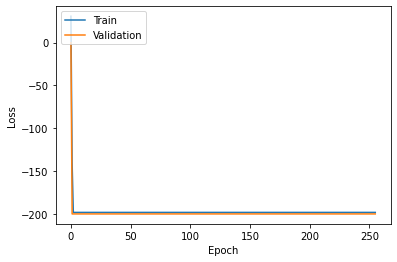

In [78]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
#plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
#plt.show()
plt.savefig('./plots/optimised_loss.pdf')
plt.savefig('./plots/optimised_loss.jpeg')

[[1.3080428]
 [1.2468153]
 [1.214359 ]
 ...
 [1.2130387]
 [1.3543277]
 [1.2437125]]


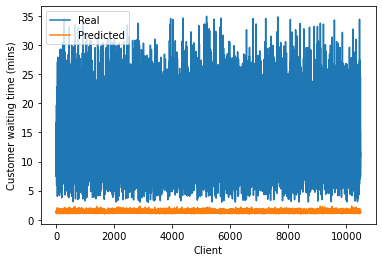

In [79]:
testy_pred = classifier.predict(testX_scaled)
myLength = len(testy_pred)
plt.plot(range(myLength), testy)
plt.plot(range(myLength), testy_pred)
plt.ylabel('Customer waiting time (mins)')
plt.xlabel('Client')
plt.legend(['Real', 'Predicted'], loc='upper left')
plt.savefig('./plots/optimised_realVsPredictedWaitingTimes.pdf')
print(testy_pred)

In [80]:
myMae = mean_absolute_error(testy, testy_pred)
print(f'The mean absolute error I get with the neural network is {myMae} minutes.')

The mean absolute error I get with the neural network is 12.185003776868587 minutes.
